# Java Jupyter notebook example
You can write normal Java.

In [2]:
var result = 2 + 2;
result

4

In [4]:
// including classes
record Complex(double a, double b) {
    public Complex add(Complex c) {
        return new Complex(a+c.a, b+c.b);
    }
}
Complex x = new Complex(10,20);
x.add(new Complex(1,1))

Complex[a=11.0, b=21.0]

In [6]:
// methods can also be implemented
int add(int a, int b) { return a+b; }
add(2,3)

5

# Magic commands

Besides Java code, a cell can contain special commands implemented by the kernel. These are called magic code and there are two types: magic lines and magic cells. 

**Magic lines** are lines which are prefixed with `%`. After the prefix it is followed by the magic command and the optional parameters. Below is an example of magic line:

In [10]:
// magic line which asks JShell to list the types defined in this notebook in this moment
%jshell /types

|    record Complex


**Magic cells** are similar with magic lines, but it takes as parameters the following lines. Thus the magic cells should stay in a separate cells. Below is an example of magic cell:

In [13]:
// call a bash command which Java version
%%bash
java --version

java 23 2024-09-17
Java(TM) SE Runtime Environment Oracle GraalVM 23+37.1 (build 23+37-jvmci-b01)
Java HotSpot(TM) 64-Bit Server VM Oracle GraalVM 23+37.1 (build 23+37-jvmci-b01, mixed mode, sharing)


## Magic commands interpolation

Sometimes there is a need to run a magic command in a more dynamic way. This can be done using magic interpolation.

Magic interpolation is the interpolation of marked content which starts with `\{` and ends with `}`. Any content decorated with those markers is evaluated in jshell and the result is transformed in a String which replaces the decorated content in the magic command.

In [16]:
String version = "1.0.2";

In [18]:
%dependency /add com.github.javafaker:javafaker:\{version}

Adding dependency com.github.javafaker:javafaker:1.0.2


Magic interpolation can go with any content after `%` or `%%` like in the following:

In [21]:
String module = "dependency";
String cmd = "/add";
String group = "com.github.javafaker";
String artifact = "javafaker";

In [23]:
%\{module} \{cmd} \{group}:\{artifact}:\{version}

Adding dependency com.github.javafaker:javafaker:1.0.2


If one wants to avoid interpreting something like `\{` not as an interpolation started than it should be escaped with another `\`.

In [26]:
String types = "/types";

In [28]:
%jshell \{types}

|    record Complex


In [30]:
%jshell \\{types}

MagicEvalException: Command not executed either because there is no handler or due to a syntax error.

## Dependency management

You can add dependencies using `%dependency /add` and after adding all dependencies you can call `%dependency /resolve`

In [33]:
%dependency /add com.github.javafaker:javafaker:1.0.2
%dependency /resolve

Adding dependency com.github.javafaker:javafaker:1.0.2
Solving dependencies
Resolved artifacts count: 5
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/com/github/javafaker/javafaker/1.0.2/javafaker-1.0.2.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/apache/commons/commons-lang3/3.5/commons-lang3-3.5.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/yaml/snakeyaml/1.23/snakeyaml-1.23-android.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/com/github/mifmif/generex/1.0.2/generex-1.0.2.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/dk/brics/automaton/automaton/1.11-8/automaton-1.11-8.jar


When added you can import and use the dependency.

In [36]:
import com.github.javafaker.Faker;
var faker = new Faker();
faker.name().fullName()

Miss Donovan Murray

## Resolving conflict dependencies

You there are conflicts you can manage them with optional. Let's take an example which have conflicts:

In [39]:
%dependency /add com.google.guava:guava:20.0 --optional
%dependency /add com.google.inject:guice:4.2.2
%dependency /add com.google.guava:guava:25.1-android
%dependency /resolve

Adding dependency com.google.guava:guava:20.0
Adding dependency com.google.inject:guice:4.2.2
Adding dependency com.google.guava:guava:25.1-android
Solving dependencies
Resolved artifacts count: 9
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/com/google/inject/guice/4.2.2/guice-4.2.2.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/javax/inject/javax.inject/1/javax.inject-1.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/aopalliance/aopalliance/1.0/aopalliance-1.0.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/com/google/guava/guava/25.1-android/guava-25.1-android.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/com/google/code/findbugs/jsr305/3.0.2/jsr305-3.0.2.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/checkerfra

## Help on magic commands

The magic `%help` provides more examples and guidance. 

In [42]:
%help

Information about registered magic handlers.

JShell commands
Documentation:
    Magic handler which runs command against JShell REPL and displays the results.
    Not all JShell commands are implemented, since some of them does not make sense with notebooks (for example edit cell is handled simply by editing the corresponding code cell and run).
Syntax:
    %jshell /methods
    List all active methods.
    %jshell /vars
    List all active variables, with type and value.
    %jshell /imports
    List all active import statements.
    %jshell /types
    List all active types: classes, interfaces, enums and annotations.
    %jshell /list -all
    List all code snippets, either active, inactive or erroneous.
    %jshell /list [id]
    List snippet with the given id.
    %jshell /list
    List all active code snippets.

Dependency manager
Documentation:
    Find and resolve a dependency using coordinates: group_id, artifact_id and version id.
    The maven public repositories are searched

## JShell commands

Some JShell commands are implemented. For example you can inspect which variables are defined

In [45]:
%jshell /vars

|    int result = 4
|    Complex x = Complex[a=10.0, b=20.0]
|    Complex $1 = Complex[a=11.0, b=21.0]
|    int $2 = 5
|    String version = "1.0.2"
|    String module = "dependency"
|    String cmd = "/add"
|    String group = "com.github.javafaker"
|    String artifact = "javafaker"
|    String types = "/types"
|    Faker faker = com.github.javafaker.Faker@17ebf85e
|    String $3 = "Miss Donovan Murray"


or the types you defined in this session

In [48]:
%jshell /types

|    record Complex


## Execute bash commands
You can execute bash scripting commands. Here we display the java version number.

In [51]:
%%bash
java --version

java 23 2024-09-17
Java(TM) SE Runtime Environment Oracle GraalVM 23+37.1 (build 23+37-jvmci-b01)
Java HotSpot(TM) 64-Bit Server VM Oracle GraalVM 23+37.1 (build 23+37-jvmci-b01, mixed mode, sharing)


You can even define variables. In fact all the lines below cell magic marker are executed as a bash script.

In [54]:
%%bash
name="John"
echo "Hello $name"

Hello John


## Show an image for immediate inspection

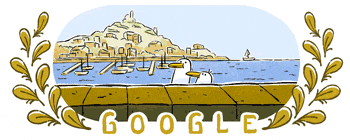

In [57]:
%image https://www.google.com/logos/doodles/2024/paris-games-sailing-6753651837110529.4-law.gif

# Display data

Jupyter notebooks uses outputs to display objects of various types. By default when an object is returned as the result of the last code operation, that result is displayed. 

The object which is displayed can be anything. If the object has a display handler registered, than that renderer is used to transform the object into a displayable content. If there is no registered display handler than the object is transformed into a string and that will be displayed.

Previously we used magic commands to display an image. However for BufferedImages there is a registered handler and if you obtain an instance of a BufferedImage it will be displayed properly.

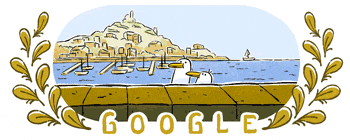

1b58102d-ca85-43d8-8141-caa3bd52ab18

In [60]:
import javax.imageio.*;
display(ImageIO.read(new URL("https://www.google.com/logos/doodles/2024/paris-games-sailing-6753651837110529.4-law.gif")));

Displayed data has a mime type. You can use that to describe how the object should be interpreted. For example we display a markdown snippet and we direct the output interpretation of the snippet through MIME type.

In [63]:
display("text/markdown", "Markdown *test* **snippet**:\n* bullet 1\n* bullet 2")

Markdown *test* **snippet**:
* bullet 1
* bullet 2

0334b7cf-da0b-44ce-a152-d3ad4198a5b1

`display` command returns an id which identifies the piece of output from the notebook which handles the display. Notice that we captured the id of the display. This id can be used to update the same display with a different content. For example we can update the content of that display with a html snippet, using the MIME type for interpretation.

In [66]:
String id = display("text/markdown", "Markdown *test* **snippet**:\n* bullet 1\n* bullet 2");

Html test snippet : bullet 1 bullet 2

In [68]:
updateDisplay(id, "text/html", 
              "Html <i>test</i> <b>snippet</b>:<p><ulist><li>bullet 1</li><li>bullet 2</li></ulist></p>")

A Java object is displayed as a String using *Objects.toString*. As such, if the object has an implementation of *toString*, that method will be called.

In [71]:
new Complex(10,Math.PI);

Complex[a=10.0, b=3.141592653589793]

The previous happens because record objects have by default an implementation of *toString* method. This is not true with other objects:

In [74]:
new ImageReadParam()

javax.imageio.ImageReadParam@3a7b322a

The previous outputs the standard way of Java to display objects, aka using the type and the numeric reference to that object.

# Using graph libraries

If you want to analyze data you perhaps need a graphical library. There are some notable options. A simple one is to use *xchart* library.

In [79]:
%dependency /add org.knowm.xchart:xchart:3.8.8
%dependency /resolve


Adding dependency org.knowm.xchart:xchart:3.8.8
Solving dependencies
Resolved artifacts count: 16
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/knowm/xchart/xchart/3.8.8/xchart-3.8.8.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/de/erichseifert/vectorgraphics2d/VectorGraphics2D/0.13/VectorGraphics2D-0.13.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/de/rototor/pdfbox/graphics2d/3.0.1/graphics2d-3.0.1.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/apache/pdfbox/pdfbox/3.0.1/pdfbox-3.0.1.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/apache/pdfbox/pdfbox-io/3.0.1/pdfbox-io-3.0.1.jar
Add to classpath: /Users/rainer/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/apache/pdfbox/fontbox/3.0.1/fontbox-3.0.1.jar
Add to classpath: /Users/rainer/

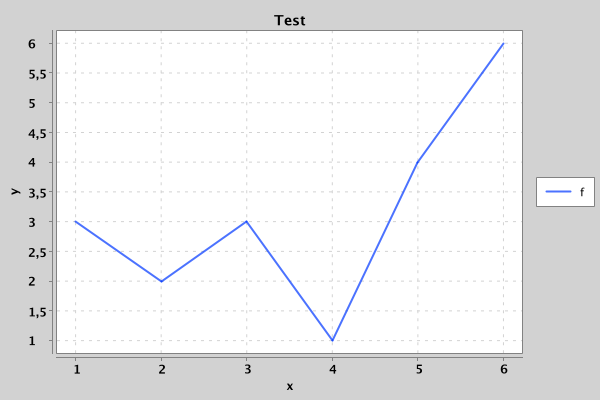

In [81]:
import org.knowm.xchart.*;

var x = new double[] {1,2,3,4,5,6};
var y = new double[] {3,2,3,1,4,6};
var chart = QuickChart.getChart("Test", "x", "y", "f", x, y);
BitmapEncoder.getBufferedImage(chart);

Other options include *JFreeChart*, *chart4j* and others.

The main reason why I contribute to this project is to have a easy to use kernel to play with my statistics and machine learning library: *rapaio*. This library is also an option for experimenting with graphical content on data analysis. Below is an example:

In [91]:
%dependency /add io.github.padreati:rapaio-core:7.0.0
%dependency /resolve

Adding dependency io.github.padreati:rapaio-core:7.0.0
Solving dependencies


Could not resolve dependencies.The following artifacts could not be resolved: io.github.padreati:rapaio-core:jar:7.0.0 (absent): Could not find artifact io.github.padreati:rapaio-core:jar:7.0.0 in central (https://repo.maven.apache.org/maven2/)

In [87]:
import rapaio.data.*;
import rapaio.core.distributions.*;
import rapaio.graphics.plot.*;
import rapaio.graphics.plot.artist.*;
import static rapaio.graphics.Plotter.*;
import static rapaio.graphics.opt.GOpts.*;
import java.awt.*;
import static rapaio.sys.WS.*;

In [89]:
var x = VarDouble.sample(Normal.of(0, 2), 1_000);
image(hist(x).xLab("x").yLab("Freq").title("Normal distribution sample"), 800, 400);

EvalException: rapaio/core/tools/HistogramTable (class file version 66.65535) was compiled with preview features that are unsupported. This version of the Java Runtime only recognizes preview features for class file version 67.65535

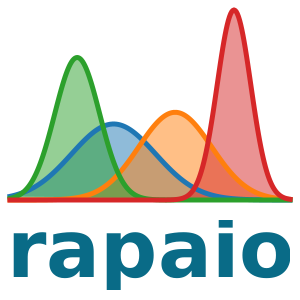

In [33]:
var x = VarDouble.seq(0, 1, 0.004).name("x");

Color cgreen = Color.decode("0x2ca02c");
Color cblue = Color.decode("0x1f77b4");
Color corange = Color.decode("0xff7f0e");
Color cred = Color.decode("0xd62728");

var ygreen = VarDouble.from(x, Normal.of(0.24, 0.08)::pdf).name("y");
var yblue = VarDouble.from(x, Normal.of(0.37, 0.15)::pdf).name("y");
var yorange = VarDouble.from(x, Normal.of(0.59, 0.13)::pdf).name("y");
var yred = VarDouble.from(x, Normal.of(0.80, 0.06)::pdf).name("y");

float alpha = 0.5f;
float lwd = 5f;

Plot up = plot();

up.add(new PolyFill(x, yblue, fill(cblue), alpha(alpha)));
up.add(new PolyFill(x, yorange, fill(corange), alpha(alpha)));
up.add(new PolyFill(x, ygreen, fill(cgreen), alpha(alpha)));
up.add(new PolyFill(x, yred, fill(cred), alpha(alpha)));

up.add(new PolyLine(false, x, yblue, color(cblue), lwd(lwd)));
up.add(new PolyLine(false, x, yorange, color(corange), lwd(lwd)));
up.add(new PolyLine(false, x, ygreen, color(cgreen), lwd(lwd)));
up.add(new PolyLine(false, x, yred, color(cred), lwd(lwd)));

up.xLim(0, 1);
up.leftThick(false);
up.leftMarkers(false);
up.bottomThick(false);
up.bottomMarkers(false);

Plot down = plot();

down.leftThick(false);
down.leftMarkers(false);
down.bottomThick(false);
down.bottomMarkers(false);

down.add(new Text(0.5, 0.6, "rapaio", font("DejaVu Sans", Font.BOLD, 80),
        halign.center(), valign.center(), color(Color.decode("0x096b87"))));
down.xLim(0, 1);
down.yLim(0, 1);

image(gridLayer(2, 1, heights(0.7, 0.3)).add(up).add(down), 300, 300);

For a detailed example of using *rapaio* library a dedicated notebook will be presented. In the meantime you can explore the notebook documentation of the library [Rapaio - Data Visualization](https://padreati.github.io/rapaio/tutorials/DataVisualization/)